In [3]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.graphics.api as smg
from scipy import stats
from matplotlib.patheffects import withStroke
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
import warnings

warnings.filterwarnings('ignore')
#warnings.filterwarnings('default')
%matplotlib inline

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [ 1. nan]


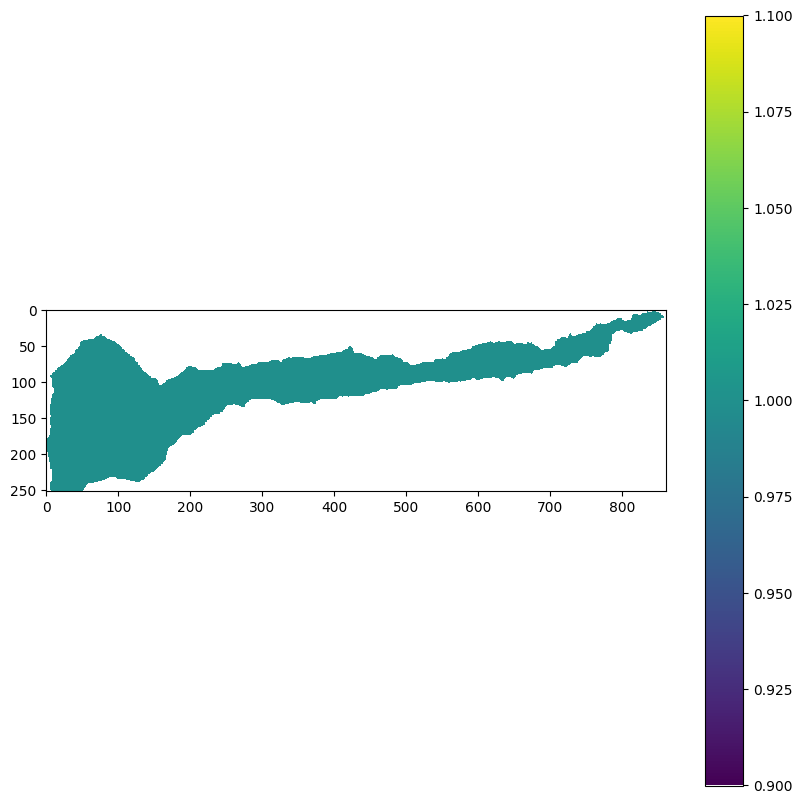

In [4]:
cuencaRaster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/Cuencacorte2.tif?raw=true')
cuencaB1 = cuencaRaster.read(1)

# Correción para organizar luego los otros valores
cuencaB1 = np.where(cuencaB1 == 255, np.nan, 1)

plt.figure(figsize=(10, 10))  # Ajusta el tamaño
plt.imshow(cuencaB1)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', cuencaB1.shape)
print('Valores únicos: ', np.unique(cuencaB1))

InventarioB1
Forma:  (252, 862)
Valores únicos:  [0 1]


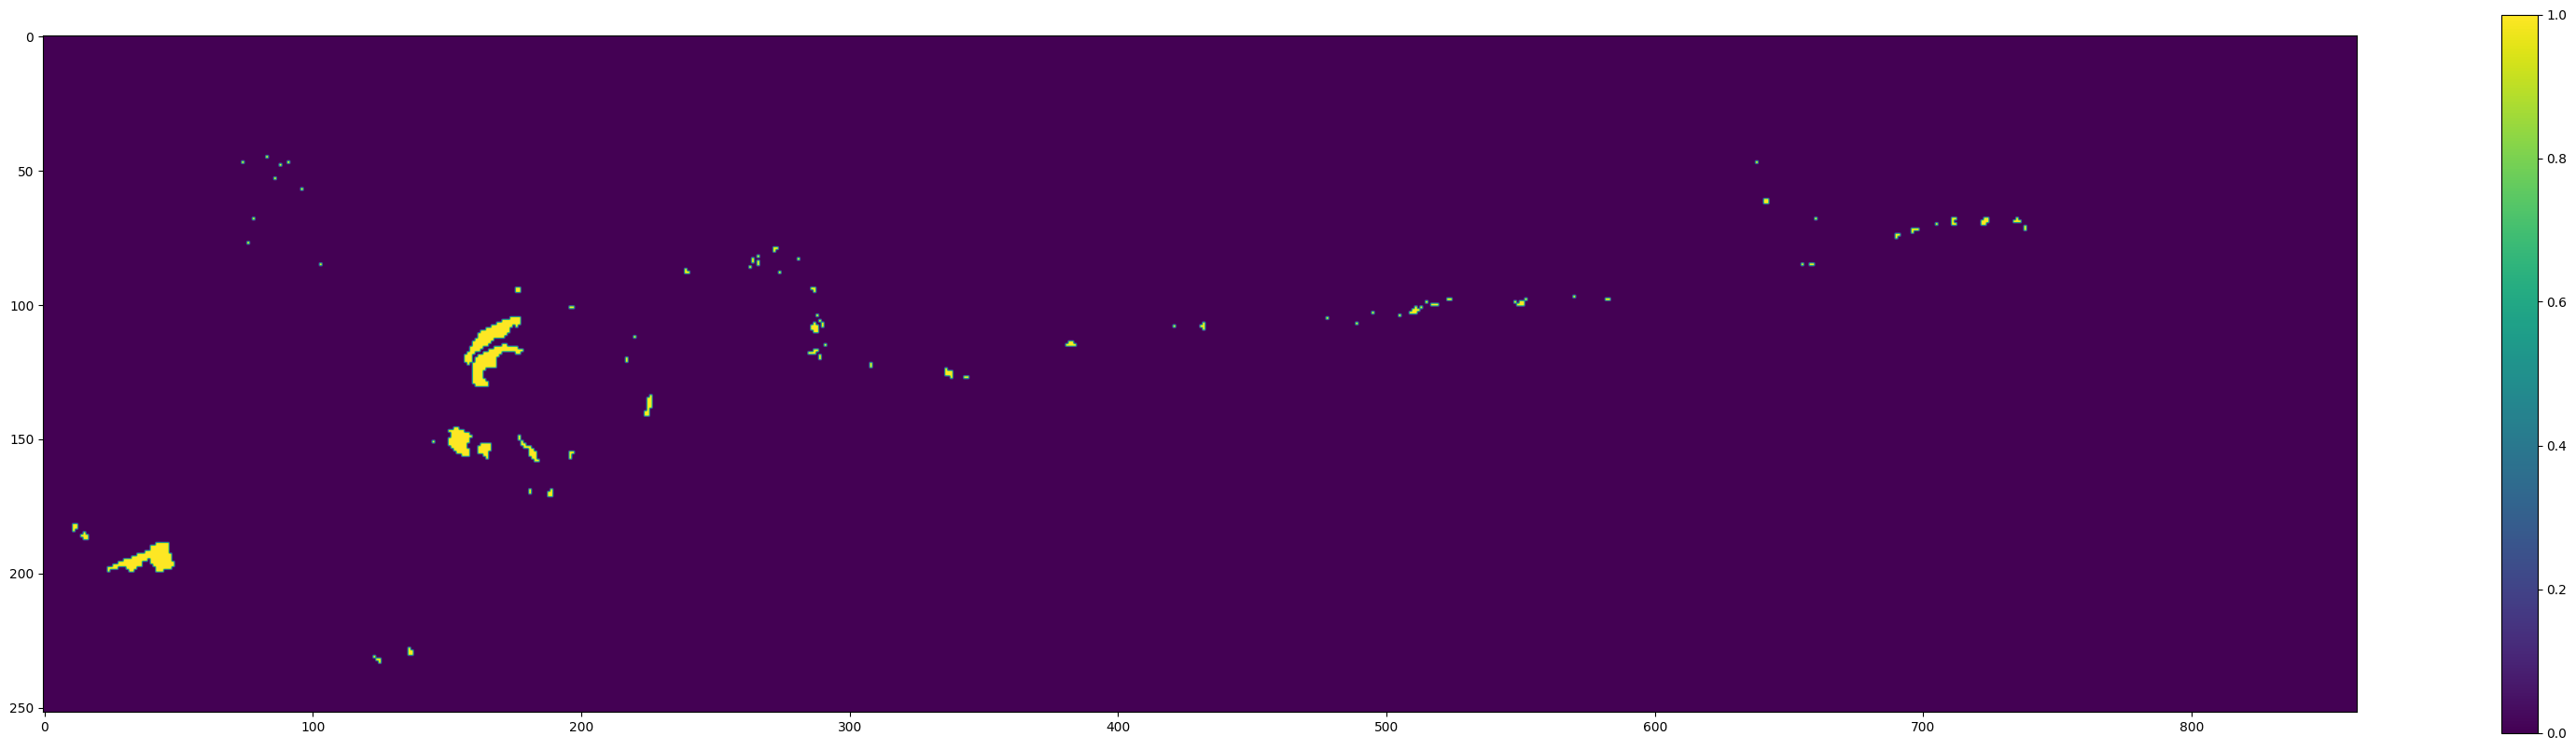

In [6]:
inventarioRaster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/InvetarioRas2.tif?raw=true')
inventarioB1 = inventarioRaster.read(1)

# Correción para organizar luego los otros valores
inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)
#inventarioB1 = np.where(inventarioB1 == 0, np.nan,  inventarioB1)
#inventarioB1 = np.where(inventarioB1 == 15, np.nan,  inventarioB1)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioB1)
plt.colorbar();

print('InventarioB1')
print('Forma: ', inventarioB1.shape)
print('Valores únicos: ', np.unique(inventarioB1))

Cuenca B1
Forma:  (252, 862)
Valores únicos:  [ 0.  1. nan]


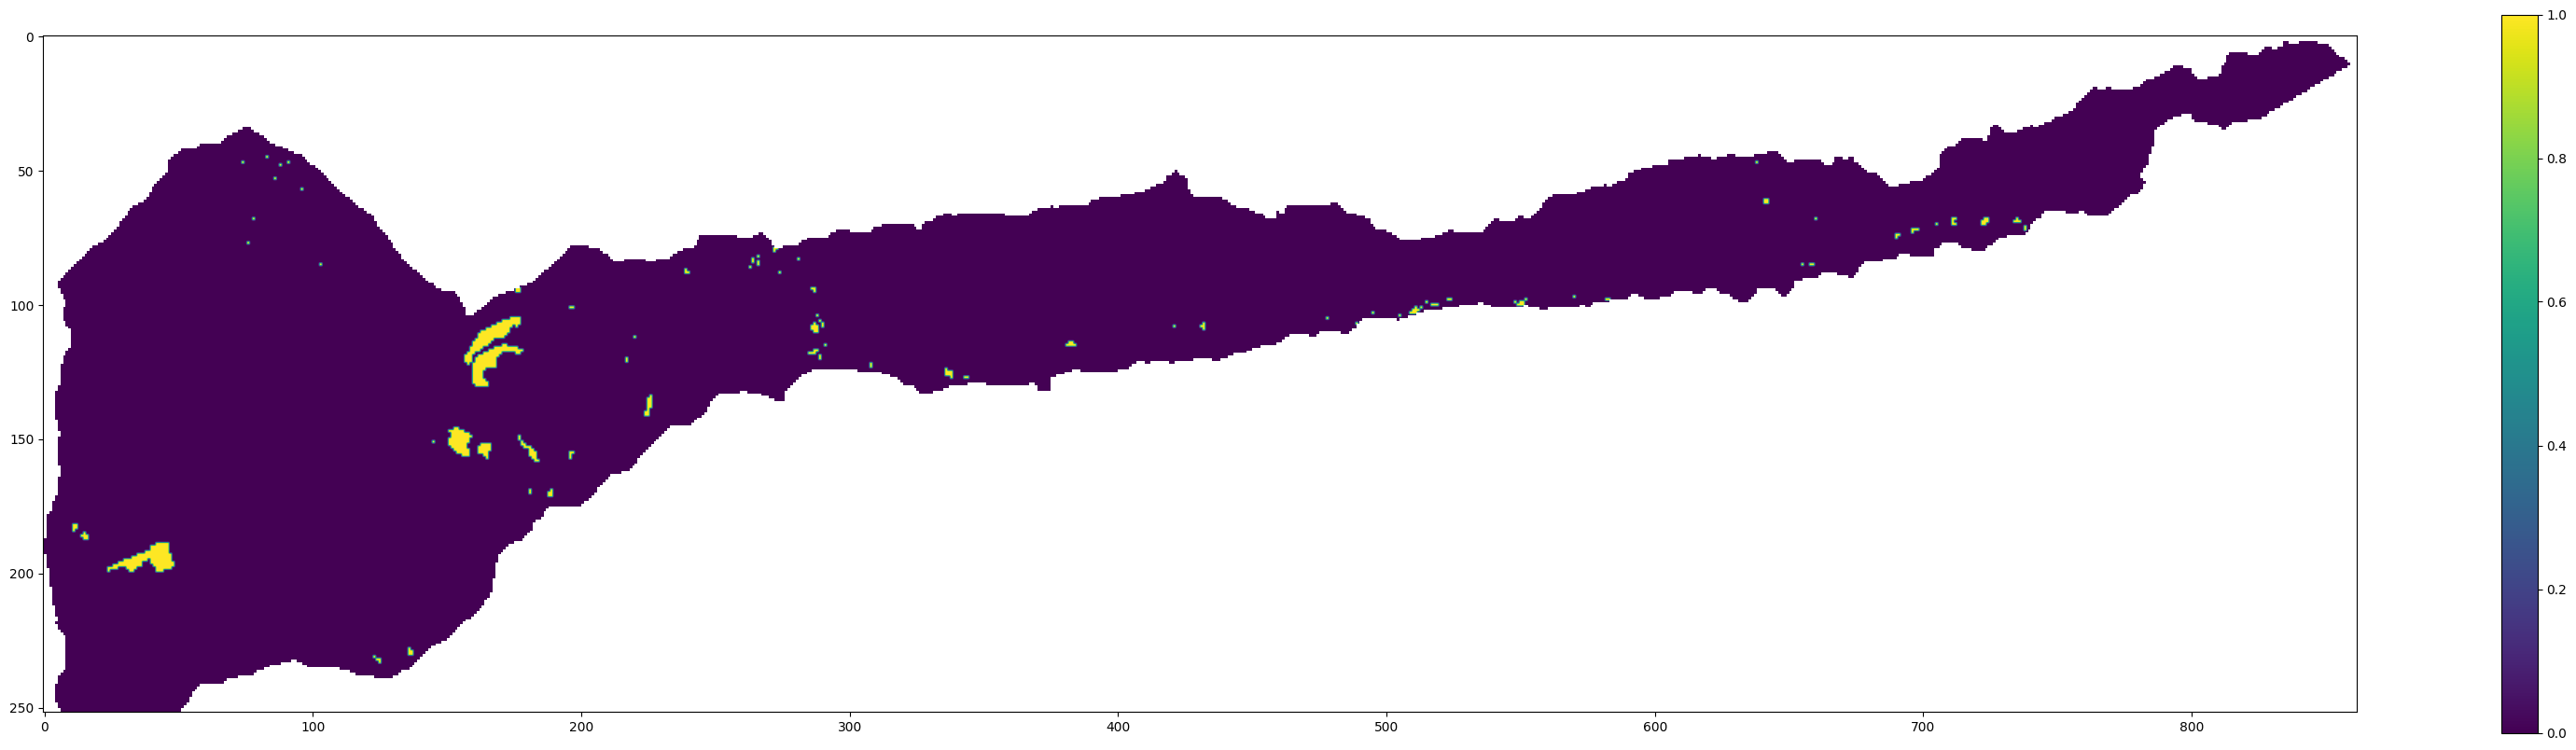

In [7]:
inventarioZona = inventarioB1 * cuencaB1

#inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioZona)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', inventarioZona.shape)
print('Valores únicos: ', np.unique(inventarioZona))

#plt.savefig('InventarioLectura.png', dpi=500, bbox_inches='tight')

Forma:  (252, 862)
Valores únicos:  [-1.000000e+00  0.000000e+00  9.690028e-03 ...  3.599896e+02  3.599927e+02
           nan]


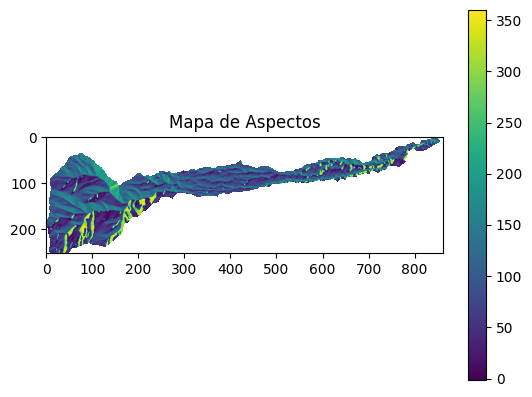

In [8]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/AspectoRas2.tif?raw=true')
aspectos=raster.read(1)
aspectos=np.where(aspectos == aspectos.min(), np.nan, aspectos)
plt.imshow(aspectos)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Aspectos')
print('Forma: ', aspectos.shape)
print('Valores únicos: ', np.unique(aspectos))

Forma:  (252, 862)
Valores únicos:  [-59.04177  -51.092407 -49.6877   ...  23.87655   26.930264        nan]


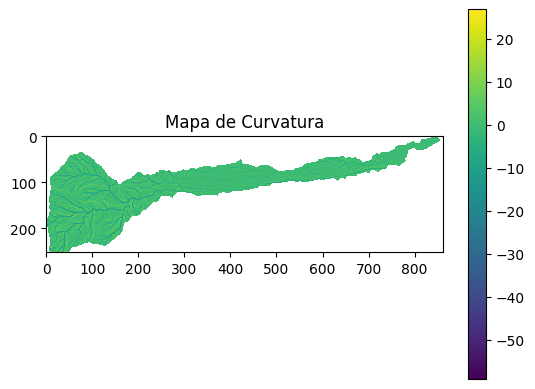

In [9]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/CurvaturaRas2.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura == curvatura.min(), np.nan, curvatura)
plt.imshow(curvatura)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Curvatura')
print('Forma: ', curvatura.shape)
print('Valores únicos: ', np.unique(curvatura))

Forma:  (252, 862)
Valores únicos:  [1582.284  1582.3328 1582.3752 ... 2934.0857 2934.192        nan]


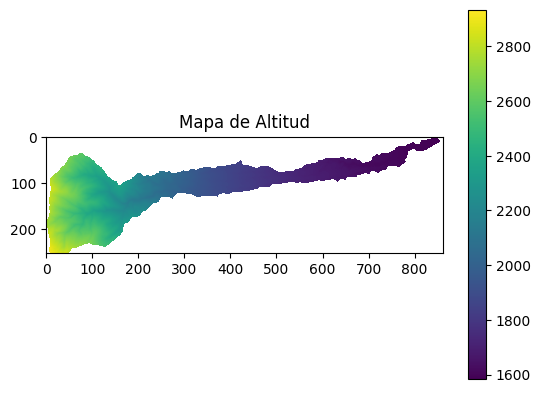

In [10]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/AltitudRas2.tif?raw=true')
altitud=raster.read(1)
altitud=np.where(altitud == altitud.min(), np.nan, altitud)
plt.imshow(altitud)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Altitud')
print('Forma: ', altitud.shape)
print('Valores únicos: ', np.unique(altitud))

Forma:  (252, 862)
Valores únicos:  [ 1.  2.  3.  4.  5. nan]


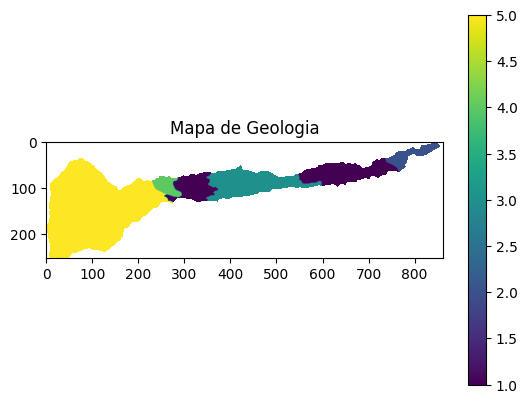

In [11]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/GeoRas2.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia == 255,np.nan,geologia)
geologia=np.where(geologia == geologia.min(), np.nan, geologia)
plt.imshow(geologia)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Geologia')
print('Forma: ', geologia.shape)
print('Valores únicos: ', np.unique(geologia))

Forma:  (252, 862)
Valores únicos:  [ 0.  1.  2.  3.  4. nan]


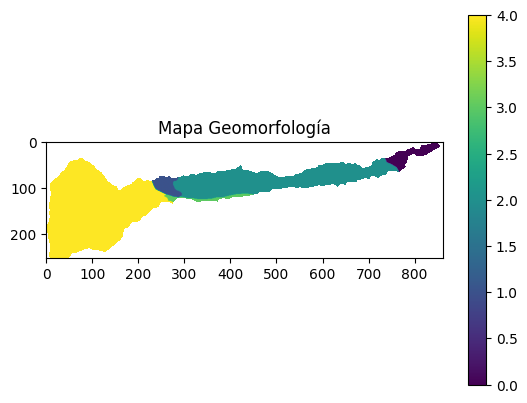

In [12]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/MorfoRas2.tif?raw=true')
geomorfo=raster.read(1)
geomorfo=np.where(geomorfo == 255,np.nan,geomorfo)
plt.imshow(geomorfo)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa Geomorfología')
print('Forma: ', geomorfo.shape)
print('Valores únicos: ', np.unique(geomorfo))

Forma:  (252, 862)
Valores únicos:  [0.0000000e+00 1.9843397e-03 3.8160379e-03 ... 6.2051132e+01 6.2054195e+01
           nan]


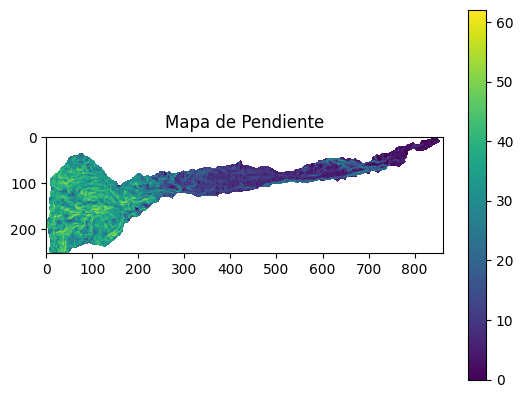

In [13]:
raster = rio.open('https://github.com/davidramirezm/Cartografia-geotecnica-David-/blob/main/Archivos/Tiffs/PendienteRas3.tif?raw=true')
slope=raster.read(1)
slope=np.where(slope == slope.min(), np.nan, slope)
plt.imshow(slope)
plt.colorbar()

# Añadir título y etiquetas de ejes
plt.title('Mapa de Pendiente')
print('Forma: ', slope.shape)
print('Valores únicos: ', np.unique(slope))

In [20]:
#Convertimos matrices a vectores
inventariovector = inventarioZona.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

aspectosvector = aspectos.ravel()
print('Longitud aspectosvector: ', aspectosvector.shape[0])

curvaturavector = curvatura.ravel()
print('Longitud curvaturavector: ', curvaturavector.shape[0])

altitudvector = altitud.ravel()
print('Longitud altitudvector: ', altitudvector.shape[0])

geologiavector = geologia.ravel()
print('Longitud geologiavector: ', geologiavector.shape[0])

geomorfovector = geomorfo.ravel()
print('Longitud geomorfovector: ', geomorfovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

#eliminamos los nans del vector
inventariovectorMenM = inventariovector[~np.isnan(inventariovector)]
print('Longitud inventariovectorMenM: ', inventariovectorMenM.shape[0])

aspectosvectorMenM = aspectosvector[~np.isnan(aspectosvector)]
print('Longitud aspectosvectorMenM: ', aspectosvectorMenM.shape[0])

curvaturavectorMenM = curvaturavector[~np.isnan(curvaturavector)]
print('Longitud curvaturavectorMenM: ', curvaturavectorMenM.shape[0])

altitudvectorMenM = altitudvector[~np.isnan(altitudvector)]
print('Longitud altitudvectorMenM: ', altitudvectorMenM.shape[0])

geologiavectorMenM = geologiavector[~np.isnan(geologiavector)]
print('Longitud geologiavectorMenM: ', geologiavectorMenM.shape[0])

geomorfovectorMenM = geomorfovector[~np.isnan(geomorfovector)]
print('Longitud geomorfovectorMenM: ', geomorfovectorMenM.shape[0])

slopevectorMenM = slopevector[~np.isnan(slopevector)]
print('Longitud slopevectorMenM: ', slopevectorMenM.shape[0])

#Realizamos el Dataframe

diccionario={'inventario':inventariovectorMenM, 'aspectos':aspectosvectorMenM, 'curvatura':curvaturavectorMenM,
               'altitud':altitudvectorMenM,'geologia':geologiavectorMenM,
               'geomorfologia':geomorfovectorMenM, 'pendiente':slopevectorMenM}

tablaDatos=pd.DataFrame(diccionario)
print(list(tablaDatos.columns))

tablaDatos.tail(5)

Longitud inventariovector:  217224
Longitud aspectosvector:  217224
Longitud curvaturavector:  217224
Longitud altitudvector:  217224
Longitud geologiavector:  217224
Longitud geomorfovector:  217224
Longitud slopevector:  217224
Longitud inventariovectorMenM:  63282
Longitud aspectosvectorMenM:  63282
Longitud curvaturavectorMenM:  63282
Longitud altitudvectorMenM:  63282
Longitud geologiavectorMenM:  63282
Longitud geomorfovectorMenM:  63282
Longitud slopevectorMenM:  63282
['inventario', 'aspectos', 'curvatura', 'altitud', 'geologia', 'geomorfologia', 'pendiente']


,inventario,aspectos,curvatura,altitud,geologia,geomorfologia,pendiente
63277,0.0,67.359482,-2.209582,2822.357666,5.0,4.0,33.464508
63278,0.0,31.936472,13.475179,2820.012939,5.0,4.0,28.379774
63279,0.0,33.755505,11.376484,2816.632080,5.0,4.0,27.254066
63280,0.0,37.180698,6.638794,2812.989258,5.0,4.0,21.701637
63281,0.0,28.403448,1.510018,2810.272217,5.0,4.0,15.197203


In [16]:
resumen = tablaDatos.describe().T
print(resumen)

                 count          mean         std          min          25%  \
inventario     63282.0  1.019247e-02    0.100443     0.000000     0.000000   
aspectos       63282.0  1.108404e+02   84.190811    -1.000000    52.710374   
curvatura      63282.0  2.893484e-09    4.624277   -59.041771    -1.008415   
altitud        63282.0  2.166668e+03  382.658539  1582.284058  1812.693939   
geologia       63282.0  3.696343e+00    1.621941     1.000000     3.000000   
geomorfologia  63282.0  3.013622e+00    1.204152     0.000000     2.000000   
pendiente      63282.0  2.399402e+01   14.347461     0.000000    10.019297   

                       50%          75%          max  
inventario        0.000000     0.000000     1.000000  
aspectos         93.580257   141.737938   359.992706  
curvatura         0.341596     1.956921    26.930264  
altitud        2189.159668  2508.885803  2934.191895  
geologia          5.000000     5.000000     5.000000  
geomorfologia     4.000000     4.000000     4

In [17]:
varCategoricas = ['inventario', 'geologia', 'geomorfologia']
varCategoricas1 = ['geologia', 'geomorfologia']
varContinuas = ['pendiente', 'curvatura', 'aspecto', 'altitud']

tablaDatosContinuos = tablaDatos.drop(varCategoricas, axis=1)
tablaDatosContinuos.tail(5)

,aspectos,curvatura,altitud,pendiente
63277,67.359482,-2.209582,2822.357666,33.464508
63278,31.936472,13.475179,2820.012939,28.379774
63279,33.755505,11.376484,2816.632080,27.254066
63280,37.180698,6.638794,2812.989258,21.701637
63281,28.403448,1.510018,2810.272217,15.197203


In [21]:
#frecuency Ratio model (likelihood)
inventarioNanVcMenM = inventariovectorMenM.copy()
inventarioNanVcMenM[inventarioNanVcMenM == 0] = np.nan

Total Celdas: 63282 12727 3032 10304 1886 35333
Total MenM: 645 55 0 39 30 521

Peso Clases: 0.42399147755824 0.0 0.37134641773797483 1.5606303484672863 1.4466973690186193



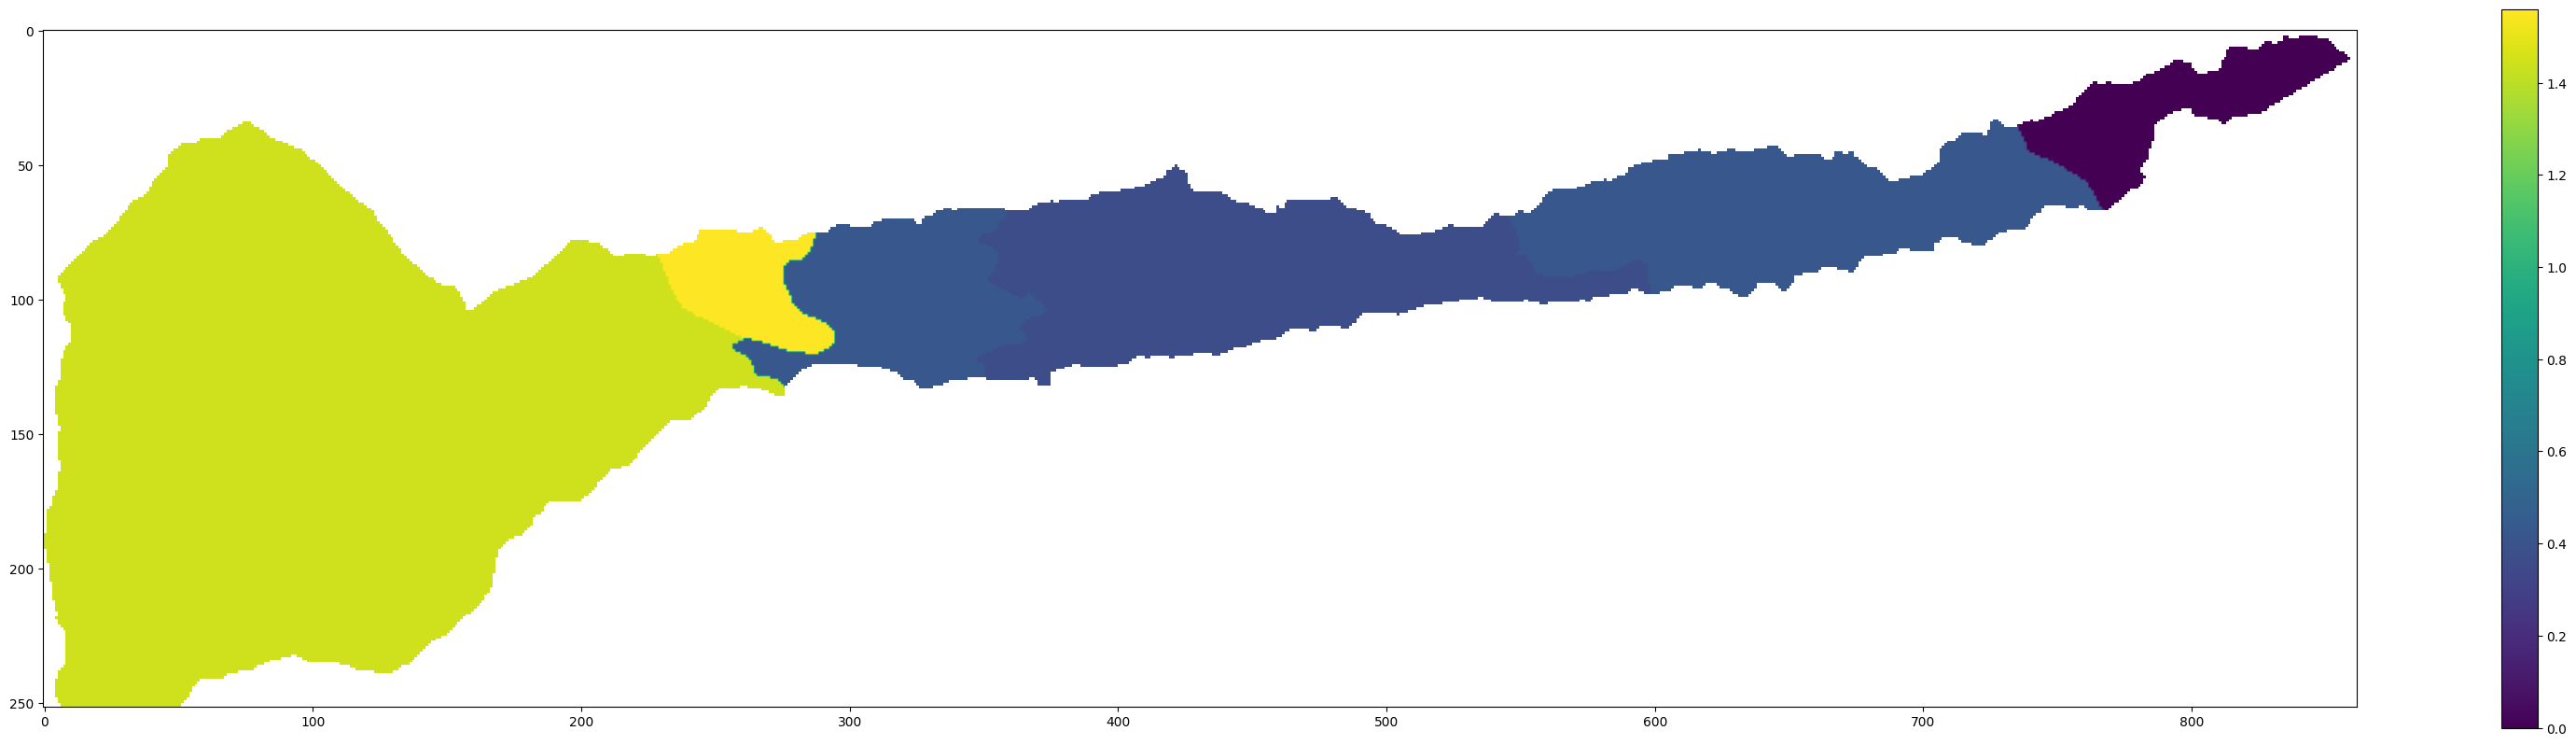

In [33]:
# Geologia Conocida
# 1: Flujo lodos y escombros I
# 2: Deposito aluviotorrencial
# 3: Flujo lodos y escombros II
# 4: Miembro volcanosedimentario Quebradagrande
# 5: Miembro volcanico Quebradagrande

geologia_serie = pd.Series(geologiavectorMenM)
NQFI = QAT = QFII = KVSQG = KVQG = 0

for celda in geologia_serie: ## Area de la clase
    if celda == 1:
        NQFI += 1
    elif celda == 2:
        QAT += 1
    elif celda == 3:
        QFII += 1
    elif celda == 4:
        KVSQG += 1
    elif celda == 5:
        KVQG += 1

totalGeologia = NQFI + QAT + QFII + KVSQG + KVQG ## Area total de las clases
print('Total Celdas:', totalGeologia, NQFI, QAT, QFII, KVSQG, KVQG)

##### 

geologiaConMenM = geologiavectorMenM * inventarioNanVcMenM
NQFIW1 = QATW1 = QFIIW1 = KVSQGW1 = KVQGW1 = 0

for celda in geologiaConMenM: ## MenM en las clases 
    if celda == 1:
        NQFIW1 += 1
    elif celda == 2:
        QATW1 += 1
    elif celda == 3:
        QFIIW1 += 1
    elif celda == 4:
        KVSQGW1 += 1
    elif celda == 5:
        KVQGW1 += 1

totalGeologia1 = NQFIW1 + QATW1 + QFIIW1 + KVSQGW1 + KVQGW1 ## MenM total en las clases
print('Total MenM:', totalGeologia1, NQFIW1, QATW1, QFIIW1, KVSQGW1, KVQGW1)

##### 

wNQFI = (NQFIW1/totalGeologia1)/(NQFI/totalGeologia)
wQAT = (QATW1/totalGeologia1)/(QAT/totalGeologia)
wQFII = (QFIIW1/totalGeologia1)/(QFII/totalGeologia)
wKVSQG = (KVSQGW1/totalGeologia1)/(KVSQG/totalGeologia)
wKVQG = (KVQGW1/totalGeologia1)/(KVQG/totalGeologia)

print('')
print('Peso Clases:', wNQFI, wQAT, wQFII, wKVSQG, wKVQG)
print('')

### ---------------- Mapa con peso de las clases

geologiaFR = np.where(geologia == 1, wNQFI, geologia)
geologiaFR = np.where(geologia == 2, wQAT, geologiaFR)
geologiaFR = np.where(geologia == 3, wQFII, geologiaFR)
geologiaFR = np.where(geologia == 4, wKVSQG, geologiaFR)
geologiaFR = np.where(geologia == 5, wKVQG, geologiaFR)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(geologiaFR)

#plt.savefig('PesoClaseGeología.png', dpi=500, bbox_inches='tight')
plt.colorbar();

Total Celdas: 60250 3032 1886 21603 1428 35333
Total MenM: 645 0 30 83 11 521

Peso Clases: 0.0 1.5606303484672863 0.37695066038416286 0.7557618396195688 1.4466973690186193



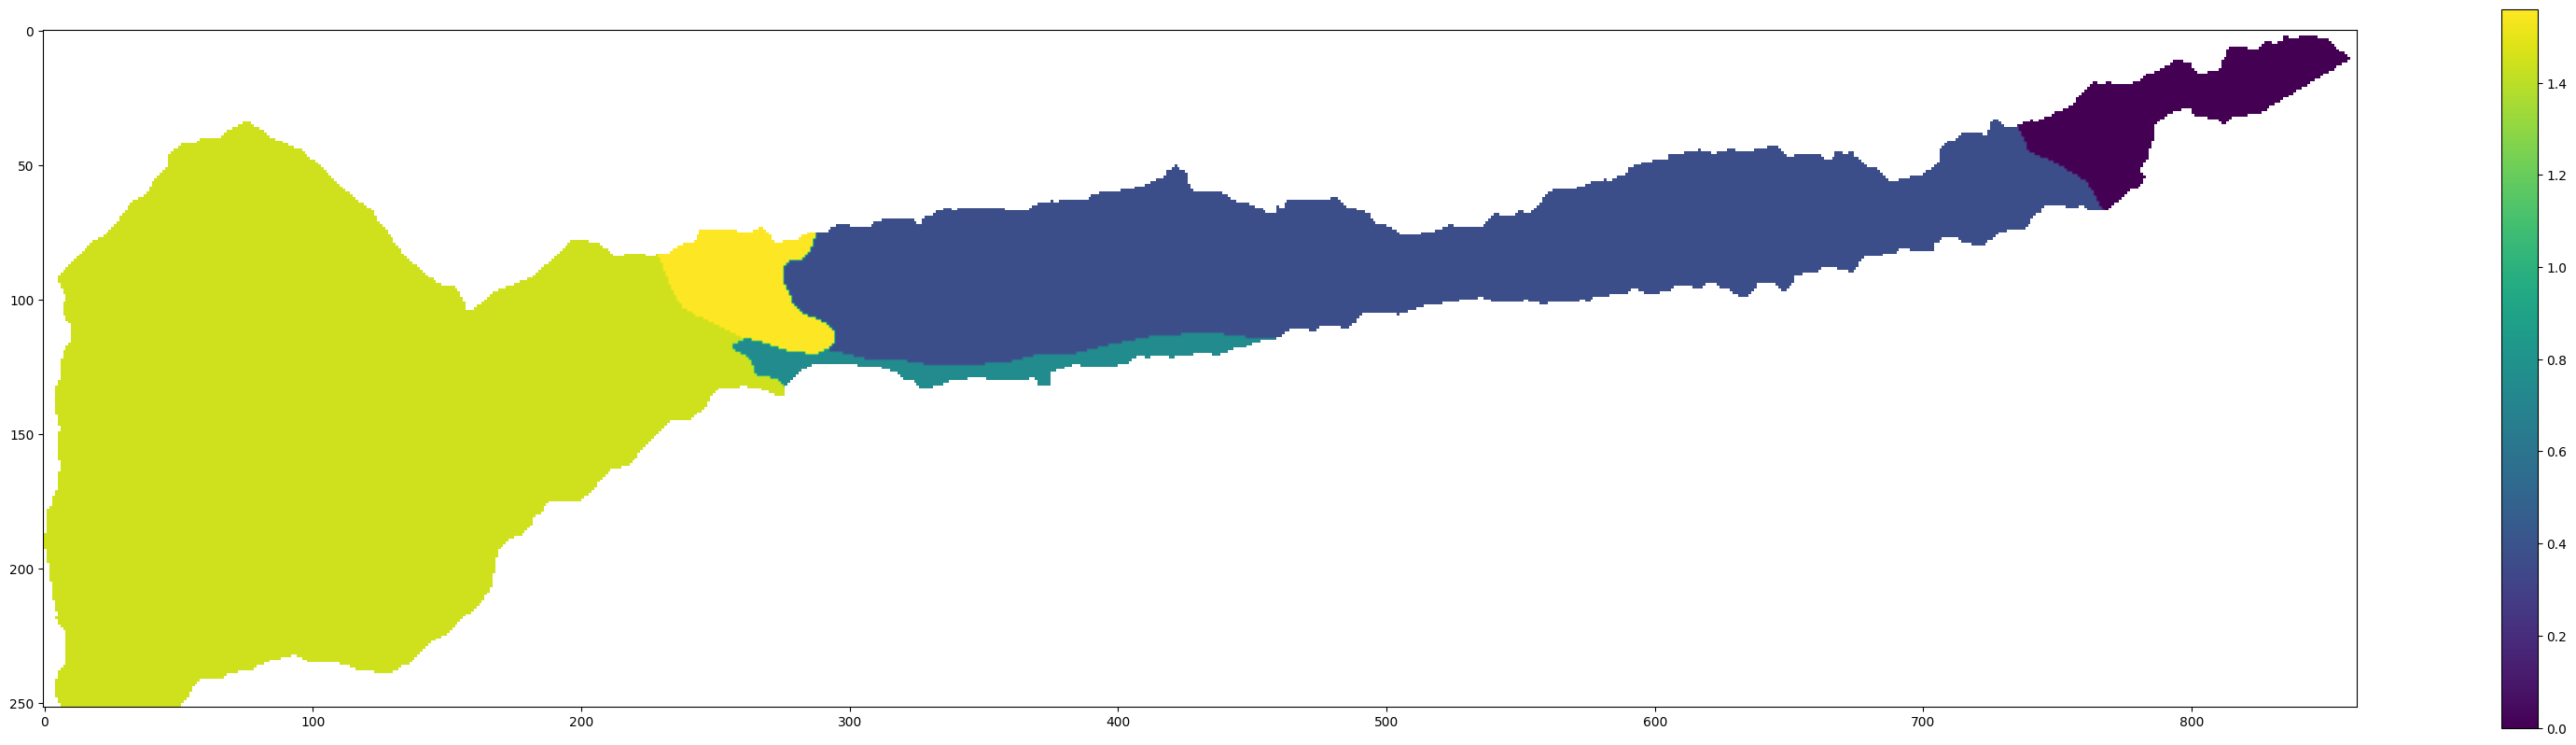

In [44]:
# Geomorfología Conocida
# 1: Terraza aluvial
# 2: Colina suelo residual
# 3: superficie suave en deposito de moderada incision 
# 4: superficie suave en deposito de poca incision 
# 5: Lomos


geomorfologia_serie = pd.Series(geomorfovectorMenM)
gm1 = gm2 = gm3 = gm4 = gm5 = 0 

for celda in geomorfologia_serie: ## Area de la clase
    if celda == 0:
        gm1 += 1
    elif celda == 1:
        gm2 += 1
    elif celda == 2:
        gm3 += 1
    elif celda == 3:
        gm4 += 1
    elif celda == 4:
        gm5 += 1
    

totalGeomorfologia = gm1 + gm2 + gm3 + gm4 + gm5 ## Area total de las clases
print('Total Celdas:', total, gm1, gm2, gm3, gm4, gm5)

##### 

geomorfologiaConMenM = geomorfovectorMenM * inventarioNanVcMenM
gm1_1 = gm2_1 = gm3_1 = gm4_1 = gm5_1 = 0

for celda in geomorfologiaConMenM: ## MenM en las clases 
    if celda == 0:
        gm1_1 += 1
    elif celda == 1:
        gm2_1 += 1
    elif celda == 2:
        gm3_1 += 1
    elif celda == 3:
        gm4_1 += 1
    elif celda == 4:
        gm5_1 += 1
   

total1 = gm1_1 + gm2_1 + gm3_1 + gm4_1 + gm5_1 ## MenM total en las clases
print('Total MenM:', total1 , gm1_1 , gm2_1 , gm3_1 , gm4_1 , gm5_1)

##### 

wgm1 = (gm1_1/total1)/(gm1/totalGeomorfologia)
wgm2 = (gm2_1/total1)/(gm2/totalGeomorfologia)
wgm3 = (gm3_1/total1)/(gm3/totalGeomorfologia)
wgm4 = (gm4_1/total1)/(gm4/totalGeomorfologia)
wgm5 = (gm5_1/total1)/(gm5/totalGeomorfologia)



print('')
print('Peso Clases:', wgm1, wgm2, wgm3, wgm4, wgm5)
print('')

### ---------------- Mapa con peso de las clases

geomorfologiaFR = np.where(geomorfo == 0, wgm1, geomorfo)
geomorfologiaFR = np.where(geomorfologiaFR == 1, wgm2, geomorfologiaFR)
geomorfologiaFR = np.where(geomorfologiaFR == 2, wgm3, geomorfologiaFR)
geomorfologiaFR = np.where(geomorfologiaFR == 3, wgm4, geomorfologiaFR)
geomorfologiaFR = np.where(geomorfologiaFR == 4, wgm5, geomorfologiaFR)


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(geomorfologiaFR)

#plt.savefig('PesoClaseGeomorfología.png', dpi=500, bbox_inches='tight')
plt.colorbar();

Total Celdas: 63282 6600 15754 8446 14380 18102
Total MenM: 645 8 29 64 341 203

Peso Clases: 0.11892318534178999 0.1806041138315555 0.7434459135740602 2.3265692014102273 1.100246407309484



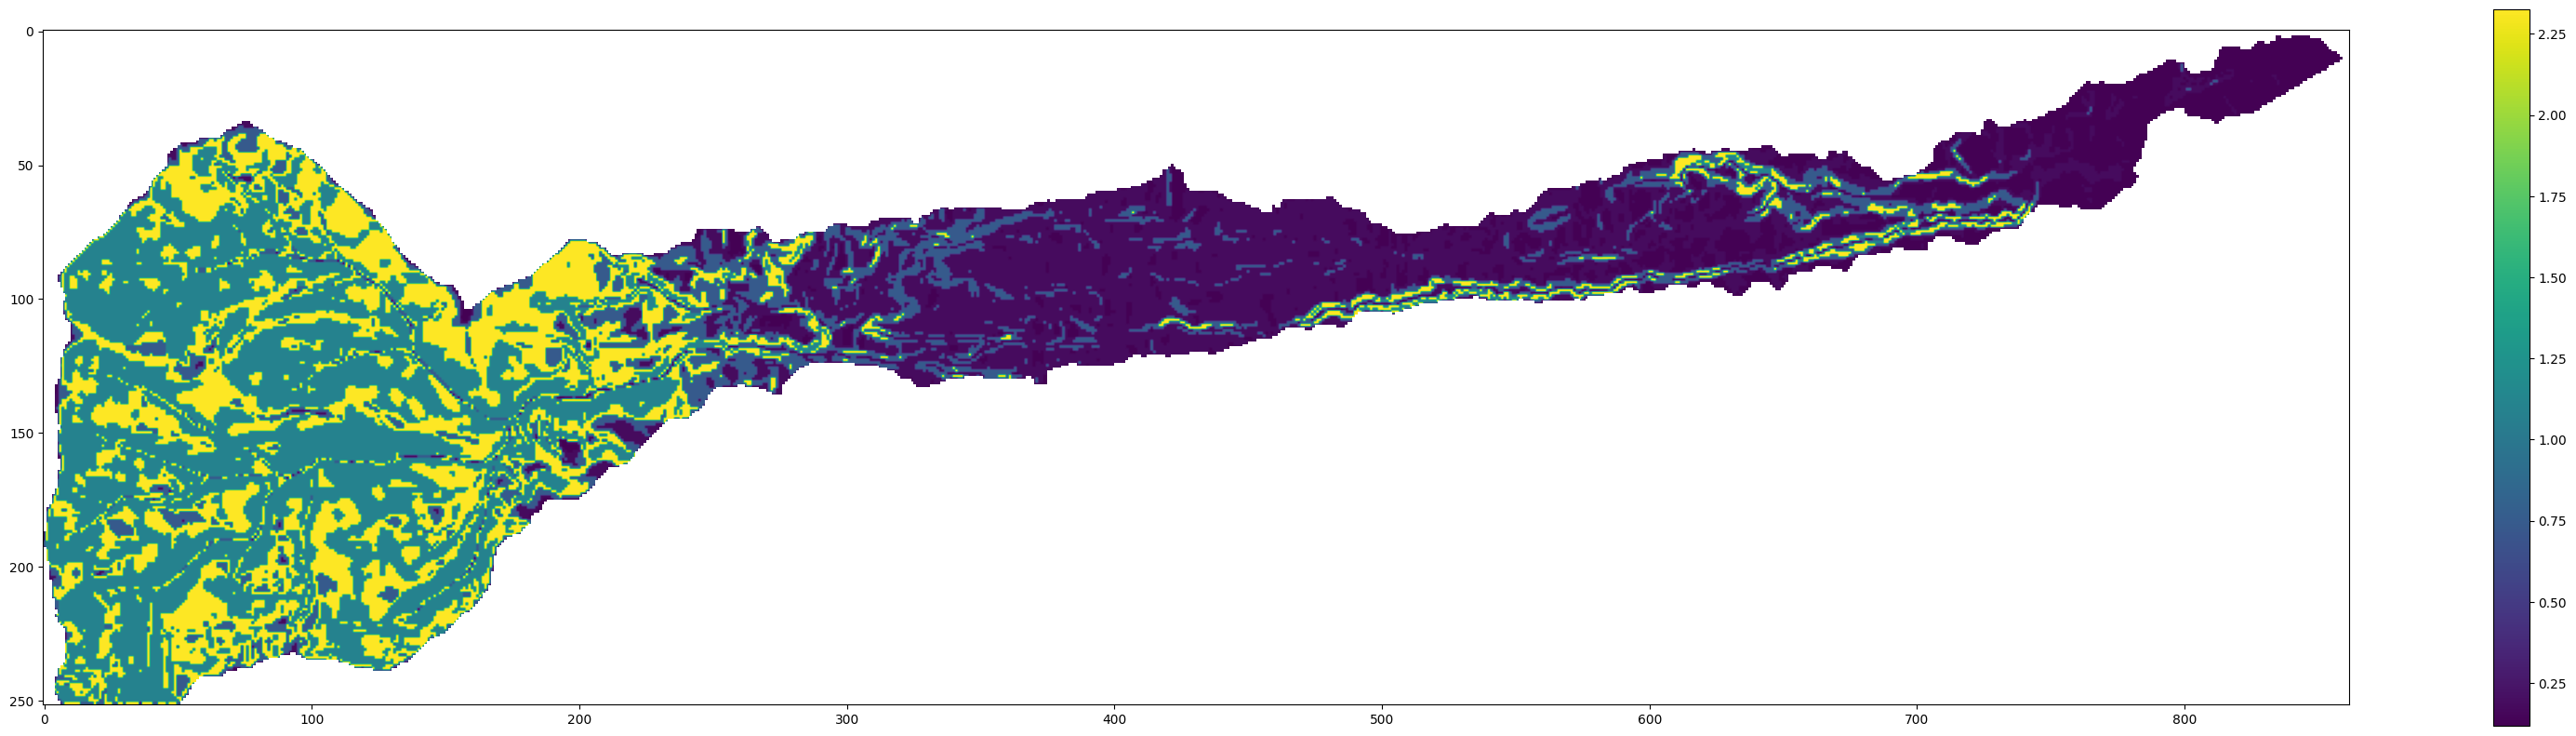

In [48]:
pendiente_serie = pd.Series(slopevectorMenM)
p1W = p2W = p3W = p4W = p5W = 0

for celda in pendiente_serie: ## Area de la clase
    if (celda >= 0) & (celda < 5):
        p1W += 1
    elif (celda >= 5) & (celda < 15):
        p2W += 1
    elif (celda >= 15) & (celda < 25):
        p3W += 1
    elif (celda >= 25) & (celda < 35):
        p4W += 1
    elif celda >= 35:
        p5W += 1

total = p1W + p2W + p3W + p4W + p5W ## Area total de las clases
print('Total Celdas:', total, p1W, p2W, p3W, p4W, p5W)

##### 

pendienteConMenM = slopevectorMenM * inventarioNanVcMenM
p1W_1 = p2W_1 = p3W_1 = p4W_1 = p5W_1 = 0

for celda in pendienteConMenM: ## MenM en las clases
    if (celda >= 0) & (celda < 5):
        p1W_1 += 1
    elif (celda >= 5) & (celda < 15):
        p2W_1 += 1
    elif (celda >= 15) & (celda < 25):
        p3W_1 += 1
    elif (celda >= 25) & (celda < 35):
        p4W_1 += 1
    elif celda >= 35:
        p5W_1 += 1

total1 = p1W_1 + p2W_1 + p3W_1 + p4W_1 + p5W_1 ## MenM total en las clases
print('Total MenM:', total1, p1W_1, p2W_1, p3W_1, p4W_1, p5W_1)

##### 

p1WW = (p1W_1/total1)/(p1W/total)
p2WW = (p2W_1/total1)/(p2W/total)
p3WW = (p3W_1/total1)/(p3W/total)
p4WW = (p4W_1/total1)/(p4W/total)
p5WW = (p5W_1/total1)/(p5W/total)

print('')
print('Peso Clases:', p1WW, p2WW, p3WW, p4WW, p5WW)
print('')

### ---------------- Mapa con peso de las clases

pendienteFR = np.where ( (np.logical_and (slope >= 0, slope < 5 )), p1WW, slope );
pendienteFR = np.where ( (np.logical_and (pendienteFR >= 5, pendienteFR < 15)), p2WW, pendienteFR);
pendienteFR = np.where ( (np.logical_and (pendienteFR >= 15, pendienteFR < 25 )), p3WW, pendienteFR);
pendienteFR = np.where ( (np.logical_and (pendienteFR >= 25, pendienteFR < 35 )), p4WW, pendienteFR);
pendienteFR = np.where ( pendienteFR >= 35, p5WW, pendienteFR);


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(pendienteFR)

#plt.savefig('PesoClasePendientes.png', dpi=500, bbox_inches='tight')
plt.colorbar();

Total Celdas: 63282 12655 25313 25314
Total MenM: 645 89 325 231

Peso Clases: 0.6899988055093584 1.2596799695716605 0.8953063935573843



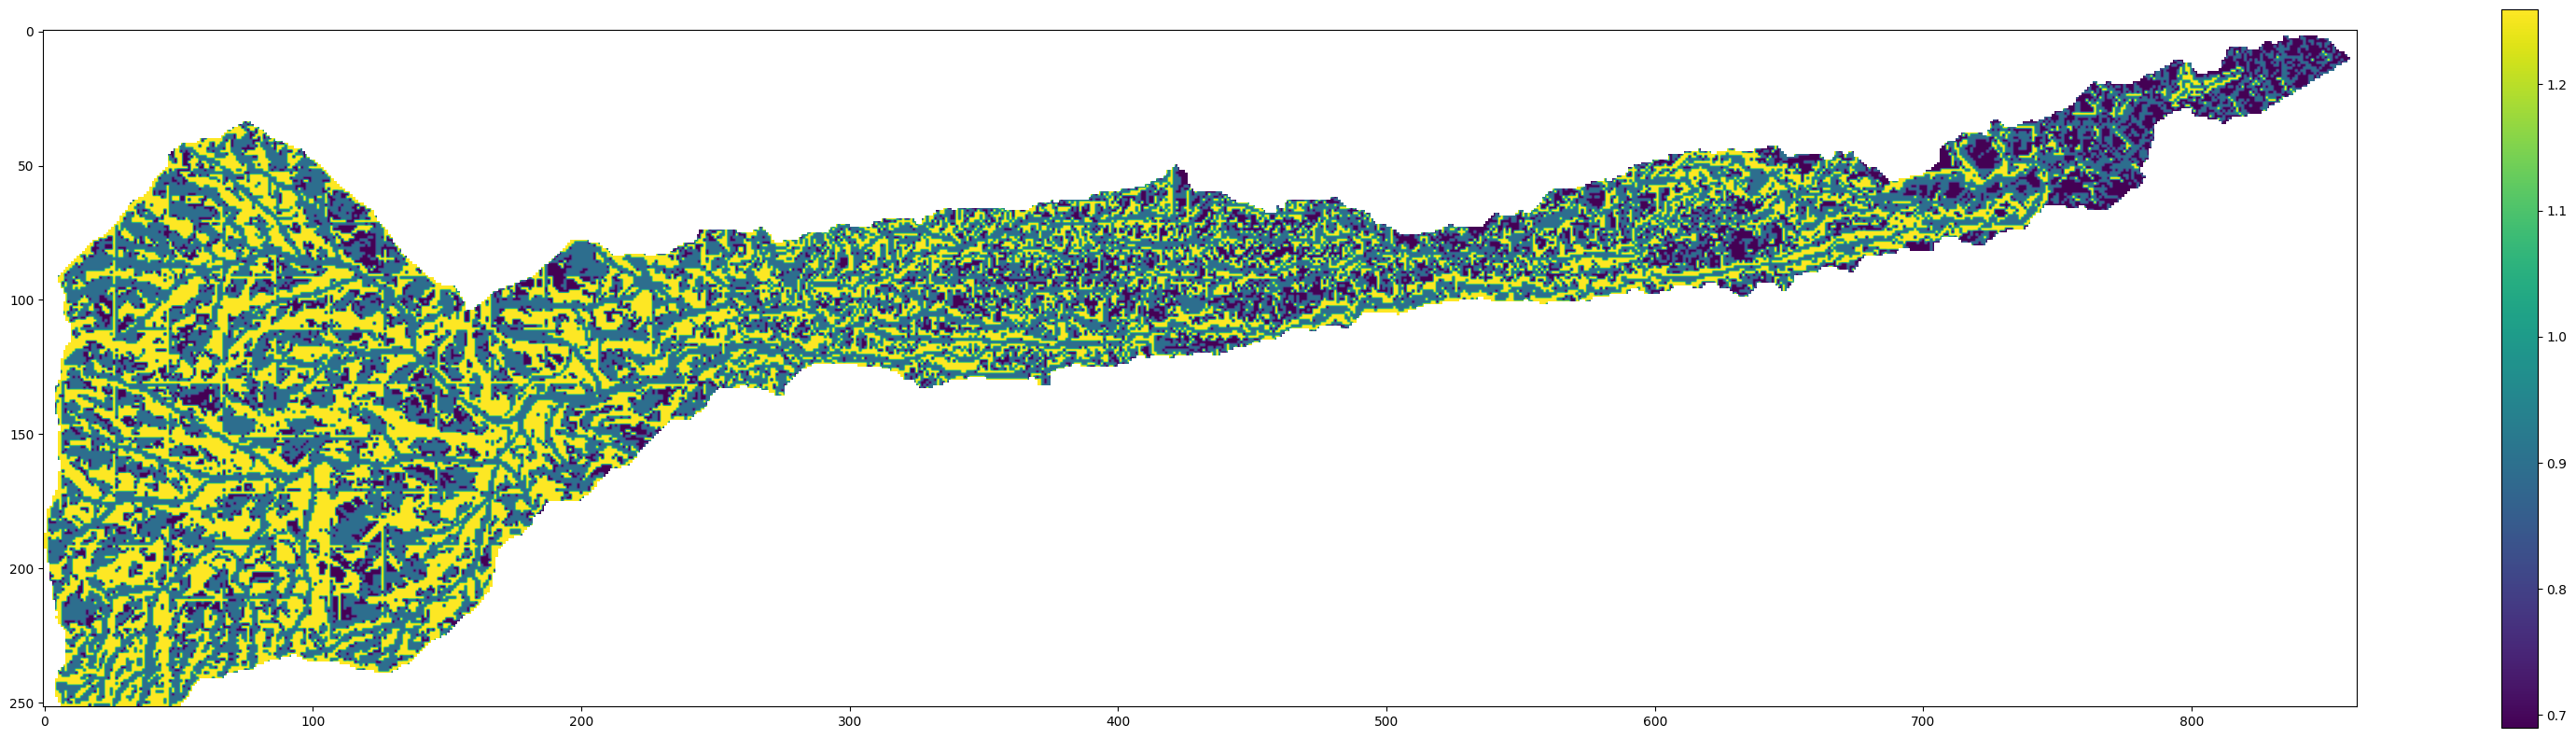

In [49]:
p40 = np.nanpercentile(curvatura, 40)
p60 = np.nanpercentile(curvatura, 60)

curvatura_serie = pd.Series(curvaturavectorMenM)
cur1W = cur2W = cur3W = 0

for celda in curvatura_serie: ## Area de la clase
    if (celda > p40) & (celda < p60):
        cur1W += 1
    elif celda >= p60:
        cur2W += 1
    elif celda <= p40:
        cur3W += 1

total = cur1W + cur2W + cur3W ## Area total de las clases
print('Total Celdas:', total, cur1W, cur2W, cur3W)

##### 

curvaturaConMenM = curvaturavectorMenM * inventarioNanVcMenM
cur1W_1 = cur2W_1 = cur3W_1 = 0

for celda in curvaturaConMenM: ## MenM en las clases
    if (celda > p40) & (celda < p60):
        cur1W_1 += 1
    elif celda >= p60:
        cur2W_1 += 1
    elif celda <= p40:
        cur3W_1 += 1

total1 = cur1W_1 + cur2W_1 + cur3W_1 ## MenM total en las clases
print('Total MenM:', total1, cur1W_1, cur2W_1, cur3W_1)

####

cur1WW = (cur1W_1/total1)/(cur1W/total)
cur2WW = (cur2W_1/total1)/(cur2W/total)
cur3WW = (cur3W_1/total1)/(cur3W/total)

print('')
print('Peso Clases:', cur1WW, cur2WW, cur3WW)
print('')

####
curvaturaFR = np.where ( (np.logical_and (curvatura > p40, curvatura <  p60)), cur1WW, curvatura)
curvaturaFR = np.where(curvaturaFR >=  p60, cur2WW, curvaturaFR)
curvaturaFR = np.where(curvaturaFR <= p40, cur3WW, curvaturaFR)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(curvaturaFR)

#plt.savefig('PesoClaseCurvatura.png', dpi=500, bbox_inches='tight')
plt.colorbar();

Total Celdas: 63185 30068 24851 3092 5174
Total MenM: 645 216 340 40 49

Peso Clases: 1.4210079748182147 0.7461234284011935 0.7890875999050407 1.0778940364624128



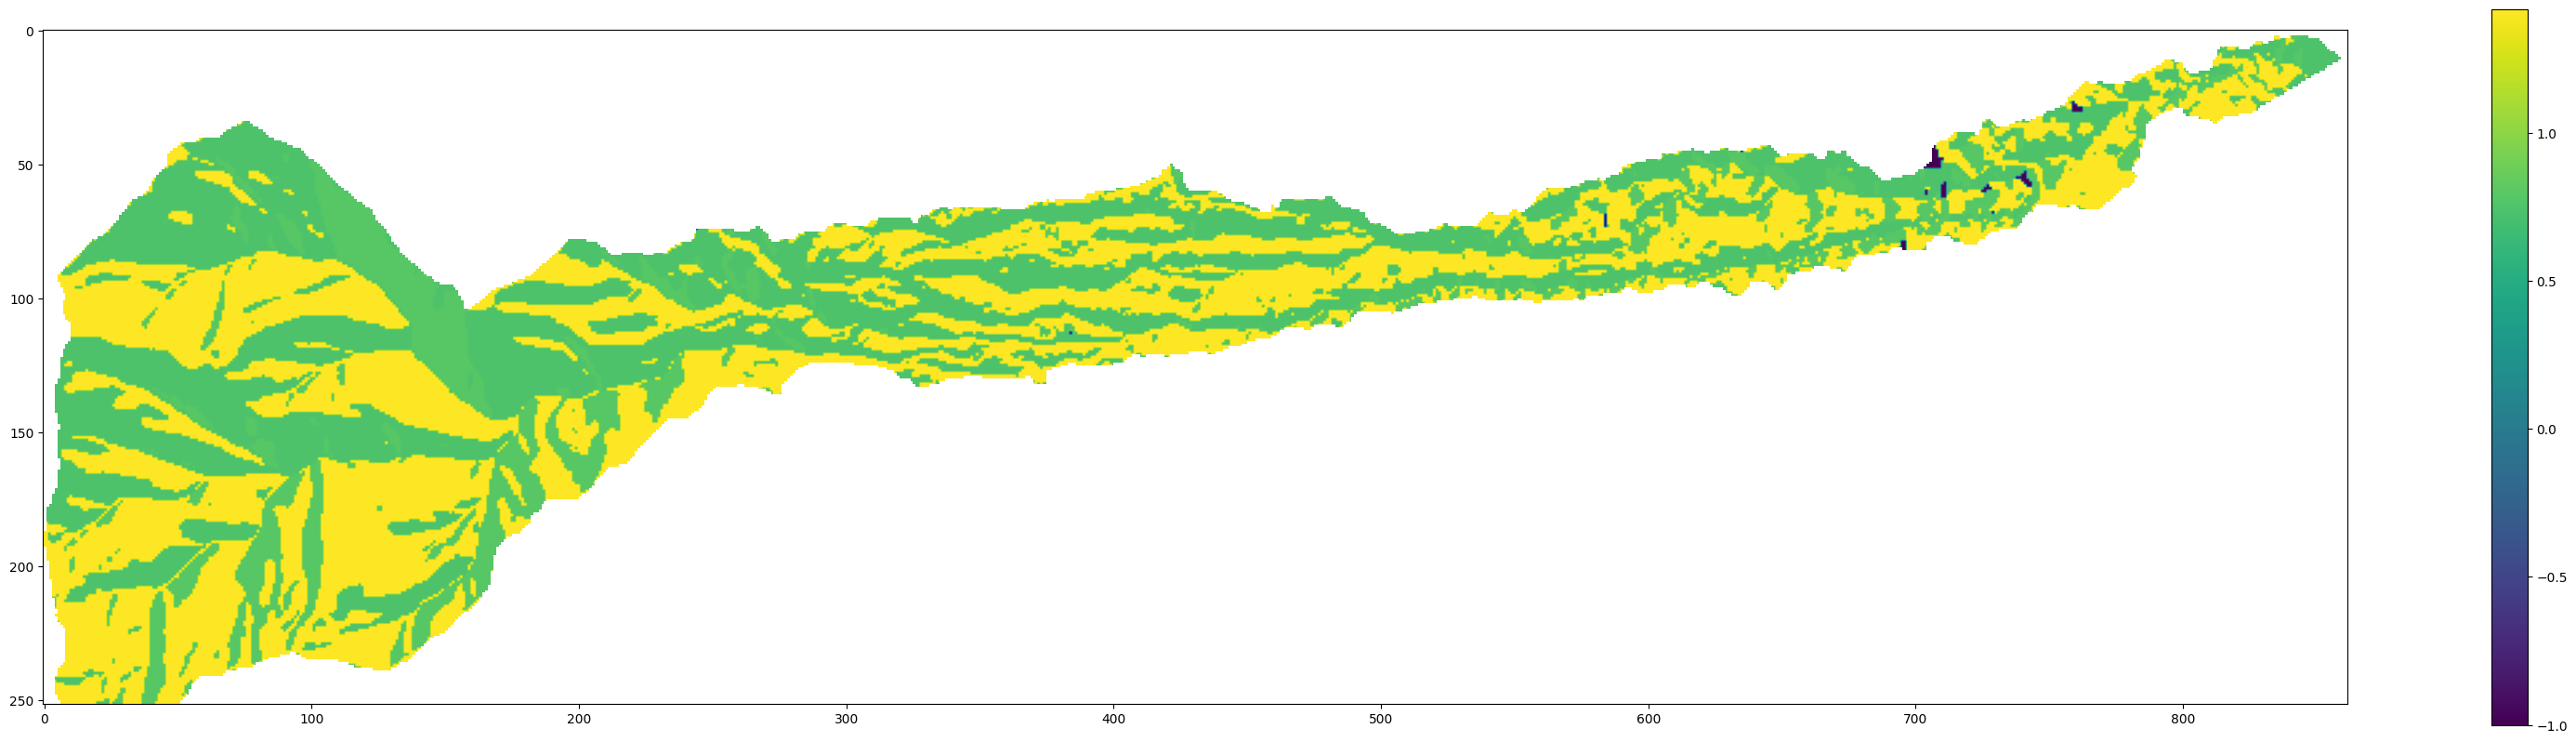

In [59]:
aspecto_serie = pd.Series(aspectosvectorMenM)
asp1W = asp2W = asp3W = asp4W = 0

for celda in aspecto_serie: ## Area de la clase
    
    if (0 <= celda) & (celda < 90):
          asp1W+=1
    elif (90 <= celda) & (celda < 180):
          asp2W+=1
    elif (180 <= celda) & (celda < 270):
          asp3W+=1
    if (celda>=270):
          asp4W+=1    

total = asp1W + asp2W + asp3W + asp4W ## Area total de las clases
print('Total Celdas:', total, asp1W, asp2W, asp3W, asp4W)

##### 

aspectoConMenM = aspectosvectorMenM * inventarioNanVcMenM
asp1W_1 = asp2W_2 = asp3W_3 = asp4W_4 = 0

for celda in aspectoConMenM: ## MenM en las clases
    
    if (0 < celda) & (celda < 90):
          asp1W_1+=1
    elif (90 <= celda) & (celda < 180):
          asp2W_2+=1
    elif (180 <= celda) & (celda < 270):
          asp3W_3+=1
    if (celda>=270):
          asp4W_4+=1

total1 = asp1W_1 + asp2W_2 + asp3W_3 + asp4W_4 ## MenM total en las clases
print('Total MenM:', total1, asp1W_1, asp2W_2, asp3W_3, asp4W_4)

####

asp1WW = (asp1W/total)/(asp1W_1/total1)
asp2WW = (asp2W/total)/(asp2W_2/total1)
asp3WW = (asp3W/total)/(asp3W_3/total1)
asp4WW = (asp4W/total)/(asp4W_4/total1)

print('')
print('Peso Clases:', asp1WW, asp2WW, asp3WW, asp4WW)
print('')

####
aspectoFR = np.where ( (np.logical_and (aspectos>=0, aspectos<90 )), asp1WW, aspectos);
aspectoFR = np.where ( (np.logical_and (aspectoFR>=90, aspectoFR<180 )), asp2WW, aspectoFR)
aspectoFR = np.where ( (np.logical_and (aspectoFR>=180, aspectoFR<270 )),asp3WW,aspectoFR )
aspectoFR = np.where ( aspectoFR >= 270, asp3WW, aspectoFR);


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(aspectoFR)
plt.colorbar();

Total Celdas: 63282 17569 10347 9228 13333 12805
Total MenM: 645 68 53 304 78 142

Peso Clases: 0.3797365073524058 0.5025530375055347 3.2321125795102867 0.573967372440125 1.088000871752495



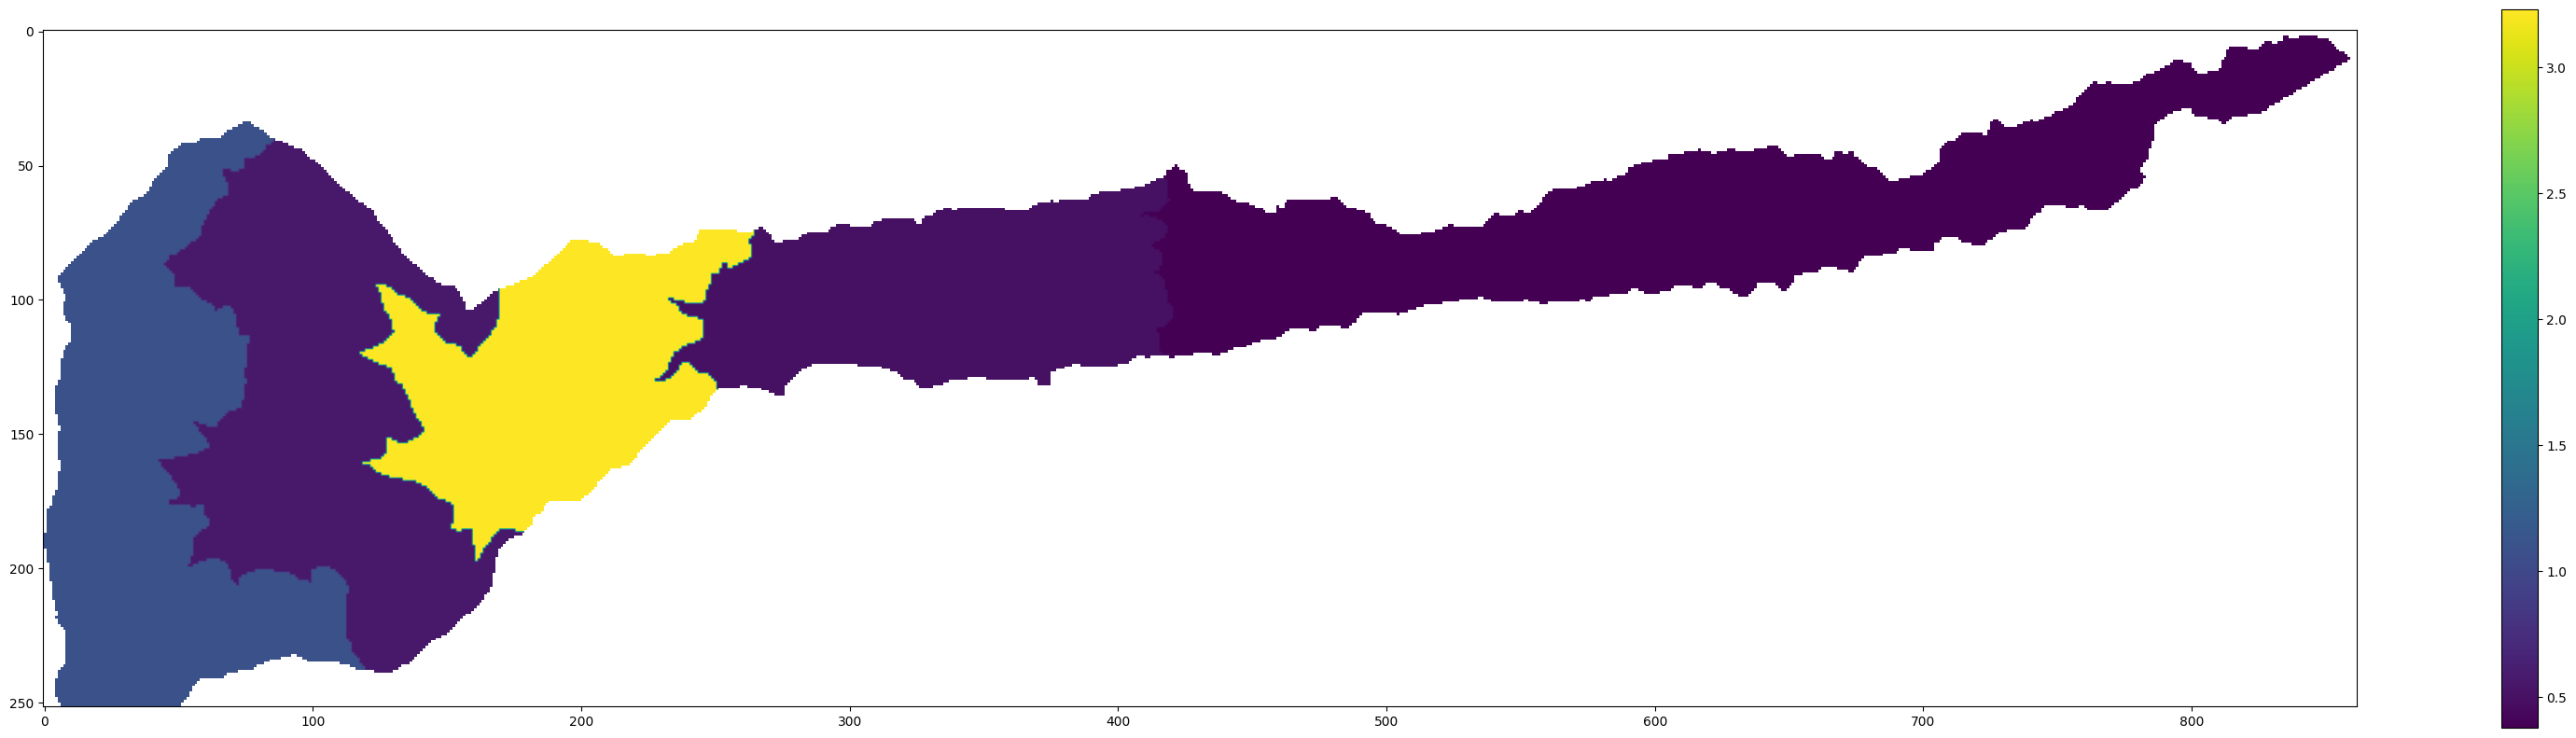

In [60]:
altitud_serie = pd.Series(altitudvectorMenM)
al1W = al2W = al3W = al4W = al5W = 0

for celda in altitud_serie: ## Area de la clase
    if (celda < 1840):
        al1W += 1
    elif (celda >= 1840) & (celda < 2080):
        al2W += 1
    elif (celda >= 2080) & (celda < 2320):
        al3W += 1
    elif (celda >= 2320) & (celda < 2560):
        al4W += 1
    elif celda >= 2560:
        al5W += 1

total = al1W + al2W + al3W + al4W + al5W ## Area total de las clases
print('Total Celdas:', total, al1W, al2W, al3W, al4W, al5W)

#####

altitudConMenM = altitudvectorMenM * inventarioNanVcMenM
al1W_1 = al2W_1 = al3W_1 = al4W_1 = al5W_1 = al6W_1 = 0

for celda in altitudConMenM: ## MenM en las clases
    if (celda < 1840):
        al1W_1 += 1
    elif (celda >= 1840) & (celda < 2080):
        al2W_1 += 1
    elif (celda >= 2080) & (celda < 2320):
        al3W_1 += 1
    elif (celda >= 2320) & (celda < 2560):
        al4W_1 += 1
    elif celda >= 2560:
        al5W_1 += 1

total1 = al1W_1 + al2W_1 + al3W_1 + al4W_1 + al5W_1  ## MenM total en las clases
print('Total MenM:', total1, al1W_1, al2W_1, al3W_1, al4W_1, al5W_1)

#####

al1WW = (al1W_1/total1)/(al1W/total)
al2WW = (al2W_1/total1)/(al2W/total)
al3WW = (al3W_1/total1)/(al3W/total)
al4WW = (al4W_1/total1)/(al4W/total)
al5WW = (al5W_1/total1)/(al5W/total)

print('')
print('Peso Clases:', al1WW, al2WW, al3WW, al4WW, al5WW)
print('')

#####

altitudFR = np.where ( altitud < 1840, al1WW, altitud)
altitudFR = np.where ( (np.logical_and (altitudFR >= 1840, altitudFR < 2080)), al2WW, altitudFR)
altitudFR = np.where ( (np.logical_and (altitudFR >= 2080, altitudFR < 2320)), al3WW, altitudFR)
altitudFR = np.where ( (np.logical_and (altitudFR >= 2320, altitudFR < 2560)), al4WW, altitudFR)
altitudFR = np.where ( altitudFR >= 2560, al5WW, altitudFR)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(altitudFR)

#plt.savefig('MHeuristico_AltitudReclasificado.png', dpi=500, bbox_inches='tight')
plt.colorbar();

Text(0.5, 1.0, 'indice susceptibilidad Likelihood')

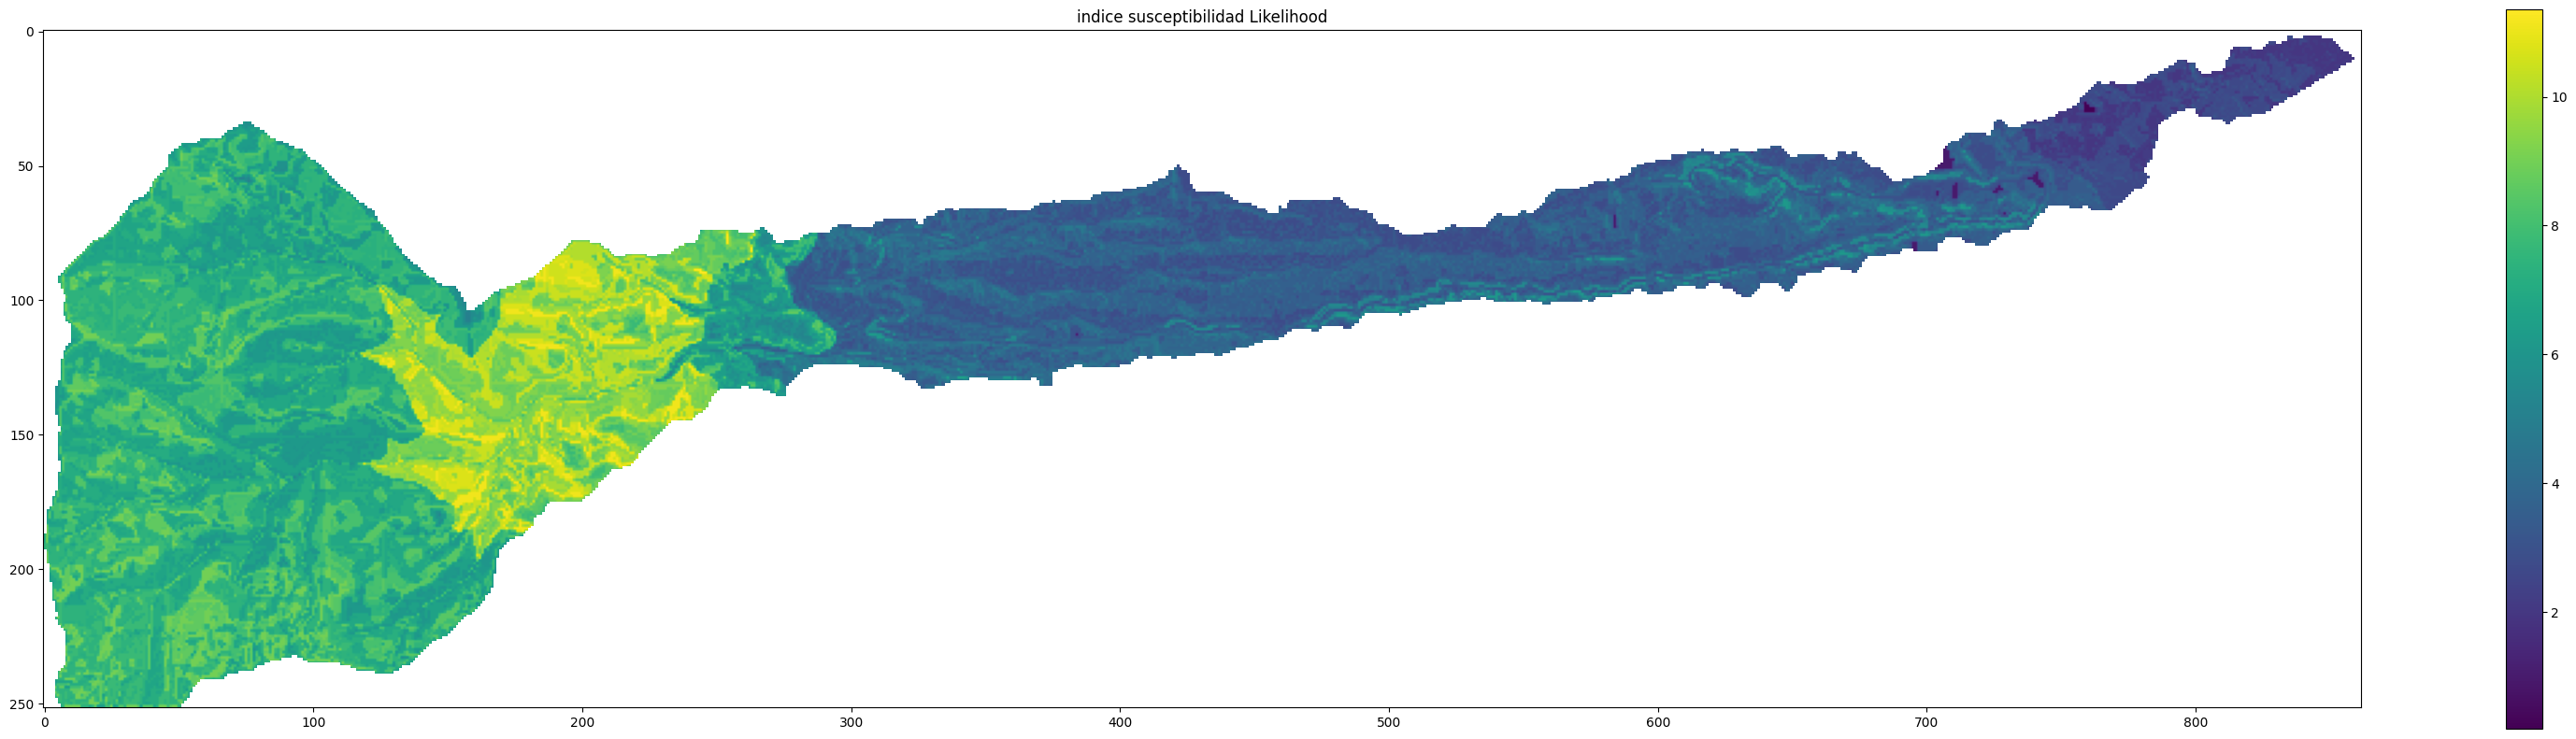

In [77]:
#Mapa de susceptibilidad con el método frecuency Ratio model (likelihood)
IS_FR = geologiaFR + geomorfologiaFR + pendienteFR + curvaturaFR + aspectoFR + altitudFR

plt.figure(figsize=(40, 10))
plt.imshow(IS_FR);
plt.colorbar();
plt.title('indice susceptibilidad Likelihood')

In [78]:
inventarioZonaVc = inventarioZona.ravel()
inventarioVcMenM2 = inventarioZonaVc[~np.isnan(inventarioZonaVc)]

IS_FR_Vc = IS_FR.ravel()
IS_FR_VcMenM2 = IS_FR_Vc[~np.isnan(IS_FR_Vc)]

print('Longitud inventarioVcMenM2: ', inventariovectorMenM.shape[0])
print('Longitud IS_FR_VcMenM2: ', IS_FR_VcMenM2.shape[0], '\n')

#-------------------------------------------

y_real = inventarioVcMenM2
y_IS_FR = IS_FR_VcMenM2

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ajustar el umbral según sea necesario
umbral = (np.nanmin(IS_FR) + np.nanmax(IS_FR))/2
print('Umbral para clasificar como 1:', umbral, '\n')
y_pred = (IS_FR_VcMenM2 > umbral).astype(int)

# Calcular métricas de evaluación para cada clase
### NOTA: luego del y_real se puede poner la predicción binario o el IS_FR_VcMenM2 original

from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_real, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_real, y_pred))

Longitud inventarioVcMenM2:  63282
Longitud IS_FR_VcMenM2:  63282 

Umbral para clasificar como 1: 5.774644535922464 

              precision    recall  f1-score   support

         0.0       1.00      0.42      0.59     62637
         1.0       0.01      0.86      0.03       645

    accuracy                           0.42     63282
   macro avg       0.51      0.64      0.31     63282
weighted avg       0.99      0.42      0.58     63282



Text(0.7, 0.1, 'AUC=0.7505%')

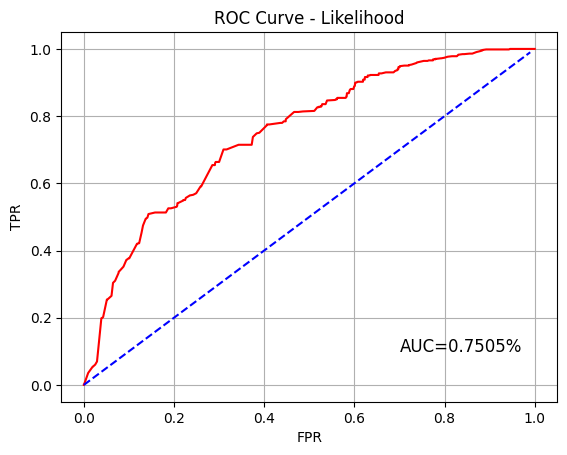

In [79]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_real, y_IS_FR)
plt.plot(fpr,tpr,color='r')
xb = [i*0.01 for i in range(100)]
yb = [i*0.01 for i in range(100)]

plt.plot(xb, yb, linestyle = '--', color = 'b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - Likelihood')
auc = str(round(metrics.auc(fpr,tpr),4))
plt.text(x = 0.7, y = 0.1, s = 'AUC=' + auc + '%', size = 12)